In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile

In [2]:
all_data_df = pd.read_csv('out.csv')

In [3]:
all_data_df.columns

Index(['Unnamed: 0', 'Date', 'hhmm', 'DHI', 'DNI', 'GHI', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'Solar', 'Installed', 'Normalized_Solar'],
      dtype='object')

In [4]:
all_data_df.describe()

,Unnamed: 0,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,...,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Installed,Normalized_Solar
count,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,...,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90514.000000,90520.000000,90514.000000
mean,45259.500000,82.290046,211.000574,215.278944,61.669068,342.516527,280.774437,2.733263,16.258114,86.930466,...,0.149484,1.879301,3.167055,163.865018,80.808524,20.668934,1010.633285,36.866446,556.532258,0.050948
std,26131.017521,114.260887,314.543640,293.151831,71.465823,367.318256,341.030383,3.020745,7.618008,41.376251,...,0.020515,1.031897,1.445543,92.233456,19.192743,8.151573,5.975875,71.288253,545.122256,0.063702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.600000,6.490000,...,0.131000,0.000000,0.252000,0.000000,18.500000,-4.600000,990.000000,0.000000,121.000000,0.000000
25%,22629.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,52.760000,...,0.140000,1.100000,1.933000,110.500000,67.370000,15.000000,1010.000000,0.000000,193.000000,0.000000
50%,45259.500000,17.000000,0.000000,19.000000,26.000000,126.000000,36.000000,1.000000,18.400000,85.915000,...,0.148000,1.700000,3.300000,159.400000,86.390000,22.000000,1010.000000,1.964354,288.000000,0.007485
75%,67889.250000,130.000000,391.000000,400.000000,117.000000,737.000000,594.000000,6.000000,23.000000,122.252500,...,0.160000,2.500000,4.301000,201.100000,98.930000,26.000000,1010.000000,33.047888,566.000000,0.105578
max,90519.000000,507.000000,1023.000000,1066.000000,498.000000,1023.000000,1066.000000,10.000000,27.100000,173.340000,...,0.870000,7.000000,7.169000,360.000000,100.000000,41.000000,1039.000000,356.877620,1858.000000,0.251041


In [5]:
year_2018_df=all_data_df[all_data_df['Date'].str.endswith('2018')]

In [6]:
for label in ['Unnamed: 0', 'Date', 'hhmm', 'Normalized_Solar','Installed','Fill Flag']:
    if label in year_2018_df.columns:
        year_2018_df.drop(label,axis=1,inplace=True)

/home/giang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
year_2018_df.columns

Index(['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar'],
      dtype='object')

In [8]:
year_2018_df=year_2018_df[year_2018_df['Solar']>0]

In [9]:
year_2018_df.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar
80300,183,287,312,77,845,458,7,-9.5,63.18,0.14,4.6,1.1,24.0,44.96,1.1,1037.0,54.831180
80301,201,360,384,82,872,524,7,-9.6,59.51,0.14,4.4,1.2,23.0,43.96,1.4,1036.0,66.763453
80302,235,211,351,86,891,577,7,-9.5,56.53,0.14,4.3,1.2,22.0,42.87,1.8,1036.0,83.739462
80303,256,239,395,88,906,616,4,-9.5,54.34,0.14,4.1,1.2,20.0,42.22,2.0,1035.0,103.582960
80304,246,323,440,89,914,639,7,-9.3,53.04,0.14,3.9,1.2,18.0,41.93,2.3,1035.0,118.799628


In [11]:
corr = year_2018_df.corr(method='pearson')

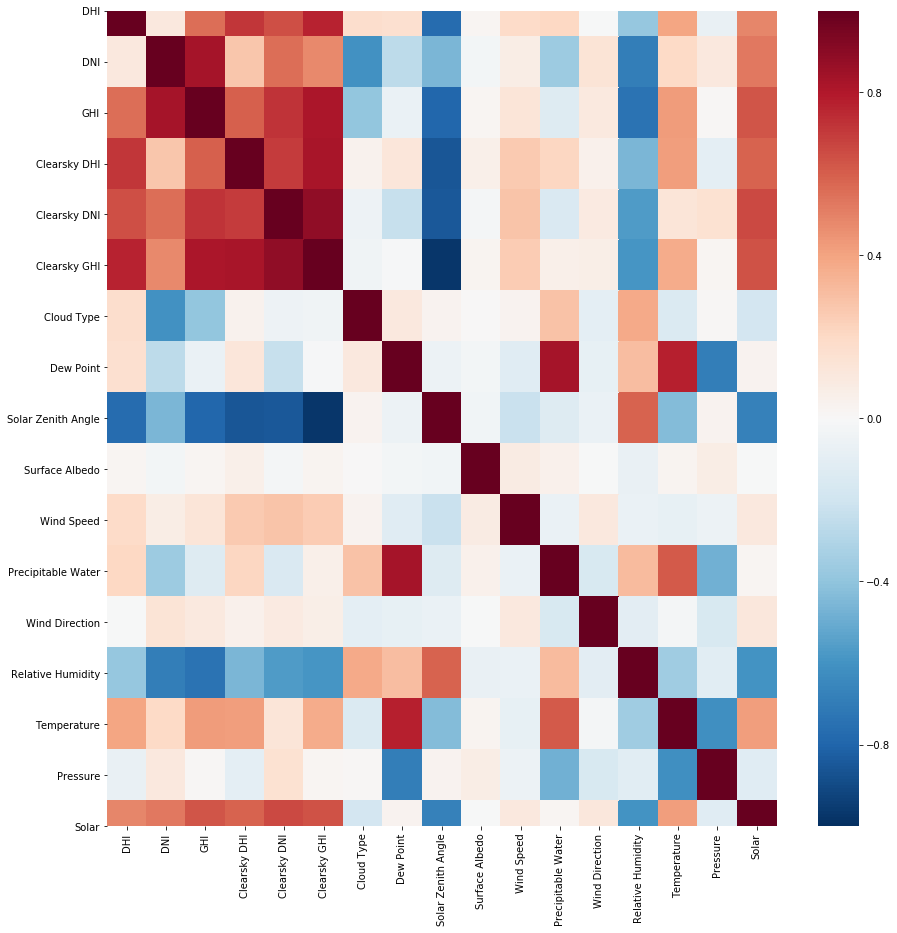

In [17]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(corr, cmap = "RdBu_r", ax=ax, vmin=-1.0, vmax =1.0)


In [15]:
abs(corr)

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar
DHI,1.000000,0.107791,0.558553,0.715689,0.646172,0.766671,0.173966,0.162038,0.769409,0.020004,0.193976,0.206985,0.003900,0.383779,0.393240,0.073334,0.485072
DNI,0.107791,1.000000,0.828721,0.278770,0.555588,0.479951,0.604097,0.261993,0.454494,0.024778,0.073964,0.365040,0.135223,0.694286,0.200290,0.101601,0.529635
GHI,0.558553,0.828721,1.000000,0.596754,0.721783,0.818638,0.392283,0.068911,0.795829,0.015891,0.132451,0.126440,0.098184,0.741460,0.423865,0.013826,0.627599
Clearsky DHI,0.715689,0.278770,0.596754,1.000000,0.700173,0.827804,0.040703,0.121265,0.858044,0.060569,0.262323,0.216613,0.052605,0.458160,0.415220,0.094414,0.586284
Clearsky DNI,0.646172,0.555588,0.721783,0.700173,1.000000,0.884738,0.048375,0.226978,0.847327,0.017203,0.287220,0.148987,0.088128,0.566058,0.131329,0.148680,0.659959
Clearsky GHI,0.766671,0.479951,0.818638,0.827804,0.884738,1.000000,0.046381,0.009382,0.974114,0.029661,0.251613,0.057636,0.069447,0.588704,0.371560,0.015835,0.634756
Cloud Type,0.173966,0.604097,0.392283,0.040703,0.048375,0.046381,1.000000,0.106555,0.036920,0.001676,0.035681,0.294564,0.095911,0.375656,0.142911,0.013857,0.182231
Dew Point,0.162038,0.261993,0.068911,0.121265,0.226978,0.009382,0.106555,1.000000,0.056861,0.023952,0.117298,0.831807,0.082439,0.309126,0.773937,0.692491,0.032541
Solar Zenith Angle,0.769409,0.454494,0.795829,0.858044,0.847327,0.974114,0.036920,0.056861,1.000000,0.038645,0.221959,0.127783,0.068952,0.587688,0.436500,0.031520,0.672576
Surface Albedo,0.020004,0.024778,0.015891,0.060569,0.017203,0.029661,0.001676,0.023952,0.038645,1.000000,0.082158,0.053252,0.003409,0.075409,0.025970,0.074378,0.003157


In [22]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(year_2018_df,test_size=0.2,random_state=1010)

In [26]:
train.columns

Index(['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar'],
      dtype='object')

In [37]:
from sklearn.neural_network import MLPRegressor
X_train = train[['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', \
           'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo', \
           'Wind Speed', 'Precipitable Water', 'Wind Direction', \
           'Relative Humidity', 'Temperature', 'Pressure']].values
y_train = train['Solar'].values

C_values = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))

axes = [item for sublist in axes for item in sublist]

clf = MLPRegressor(solver='lbfgs', alpha=alpha, random_state=1)
    clf.fit(X_train, y_train)
    X_test = test[['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', \
               'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo', \
               'Wind Speed', 'Precipitable Water', 'Wind Direction', \
               'Relative Humidity', 'Temperature', 'Pressure']].values
    print(str(alpha)+str(clf.score))
    y_test = test['Solar'].values
    y_fit = clf.predict(X_test)

1e-05<bound method RegressorMixin.score of MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)>
0.0001<bound method RegressorMixin.score of MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
        

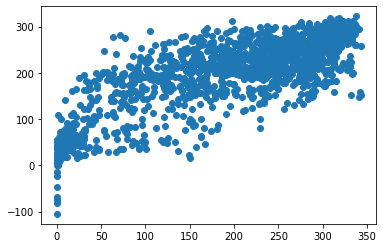

In [35]:
plt.scatter(y_test,y_fit)

In [25]:
X

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
83691,304,573,849,198,776,936,0,20.1,18.07,0.17,5.2,4.1,154.0,51.50,31.3,1015.0
83953,116,639,454,107,712,483,0,17.9,58.11,0.17,4.3,2.9,158.0,48.39,30.0,1010.0
89163,1,0,1,2,7,2,7,-0.3,91.50,0.15,3.8,0.9,341.0,71.17,4.5,1028.0
80646,72,891,483,72,891,483,0,-3.1,62.51,0.14,2.8,0.7,354.0,38.86,10.3,1030.0
83609,328,615,921,144,911,1022,7,12.1,15.36,0.17,3.5,1.7,132.0,37.81,27.8,1017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88546,32,0,32,40,462,107,8,14.5,81.61,0.15,1.5,3.1,27.0,80.41,17.9,1016.0
89408,144,632,490,86,860,557,0,11.1,56.83,0.14,1.8,1.8,86.0,62.46,18.4,1019.0
90273,85,912,631,85,912,631,0,9.5,53.21,0.14,2.8,1.5,10.0,54.55,18.9,1021.0
80623,17,217,24,17,217,24,0,-2.5,88.14,0.14,2.3,0.6,348.0,58.86,4.9,1021.0
